In [3]:
# Authors: Jonas Schluter <jonas.schluter@nyulangone.org>
# License: BSD 3 clause
__author__ = "Jonas Schluter"
__copyright__ = "Copyright 2020, MIT License"

import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, Circle
from matplotlib.collections import PatchCollection
import matplotlib.cm as cm
import numpy as np
import seaborn as sns
from hctmicrobiomemskcc.dataloading.dataloading import (
    load_microbiome_tables,
    load_metadata,
    load_all_data,
)
from hctmicrobiomemskcc.dataloading.hct_datawrangling import calculate_hct_day
from hctmicrobiomemskcc.tools.microbiotatools import (
    calculate_relative_counts,
    get_composition_at_taxlevel,
)
from hctmicrobiomemskcc.tools.tools import isfloat
import matplotlib
import pandas as pd
from hctmicrobiomemskcc.tools.microbiotatools import fill_taxonomy_table

from hctmicrobiomemskcc.visualization.stackedbars import bar_and_area_plot
%config InlineBackend.figure_format = 'retina'
matplotlib.rcParams["pdf.fonttype"] = 42
matplotlib.rcParams["ps.fonttype"] = 42
RUNTAXUMAP=False

ImportError: No module named hctmicrobiomemskcc.dataloading.dataloading

In [1]:
food = pd.read_csv("../data/cleaned_diet_data/taxUMAP_food_cts.csv", index_col="index_column")

NameError: name 'pd' is not defined

In [11]:
foodtax = pd.read_csv("/Users/schluj05/data/diet food mskcc/taxUMAP_foodID_taxa.csv", index_col="ASV")

In [29]:
food.columns = food.columns.astype(str)
foodtax.index = foodtax.index.astype(str)

# fix missing
for ix, r in foodtax.iterrows():
    foodtax.loc[ix, :] = r.apply(lambda v : v+ix if v[-1]=="_" else v)

,L1,L2,L3,L4
ASV,,,,
11111000,L1_Milk_and_Milk_Products,L2_Milks_and_milk_drinks,L3_Milk_fluid,L4_Milk_fluid_cow_goat_buttermilk
11112110,L1_Milk_and_Milk_Products,L2_Milks_and_milk_drinks,L3_Milk_fluid,L4_Milk_fluid_cow_goat_buttermilk
11113000,L1_Milk_and_Milk_Products,L2_Milks_and_milk_drinks,L3_Milk_fluid,L4_Milk_fluid_cow_goat_buttermilk
11114320,L1_Milk_and_Milk_Products,L2_Milks_and_milk_drinks,L3_Milk_fluid,L4_Milk_fluid_cow_goat_buttermilk
11114350,L1_Milk_and_Milk_Products,L2_Milks_and_milk_drinks,L3_Milk_fluid,L4_Milk_fluid_cow_goat_buttermilk
...,...,...,...,...
95104000,L1_Sugars_Sweets_and_Beverages,L2_Formulated_nutrition_beverages_energy_drink...,L3_Nutrition_drinks,L4_
95202000,L1_Sugars_Sweets_and_Beverages,L2_Formulated_nutrition_beverages_energy_drink...,L3_Nutrition_powders,L4_
95230000,L1_Sugars_Sweets_and_Beverages,L2_Formulated_nutrition_beverages_energy_drink...,L3_Nutrition_powders,L4_


In [185]:
food_L1 = food.copy()
l1_cols = list(map(lambda v: foodtax.loc[v].L1, food_L1.columns))
food_L1.columns = l1_cols
food_L1 = food_L1.groupby(food_L1.columns, axis=1).sum()

In [186]:
food_L3 = food.copy()
l3_cols = list(map(lambda v: foodtax.loc[v].L3, food_L3.columns))
food_L3.columns = l3_cols
food_L3 = food_L3.groupby(food_L3.columns, axis=1).sum()

In [19]:
from taxumap.taxumap import Taxumap

In [78]:
WEIGHTS = [5, 5, .01, .01]


In [188]:
if RUNTAXUMAP:
    tu = Taxumap(agg_levels=["L1", "L2", "L3", "L4"], weights=WEIGHTS, rel_abundances=food, taxonomy=foodtax)
    tu.transform_self(min_dist = 0.1/np.sum(WEIGHTS) )


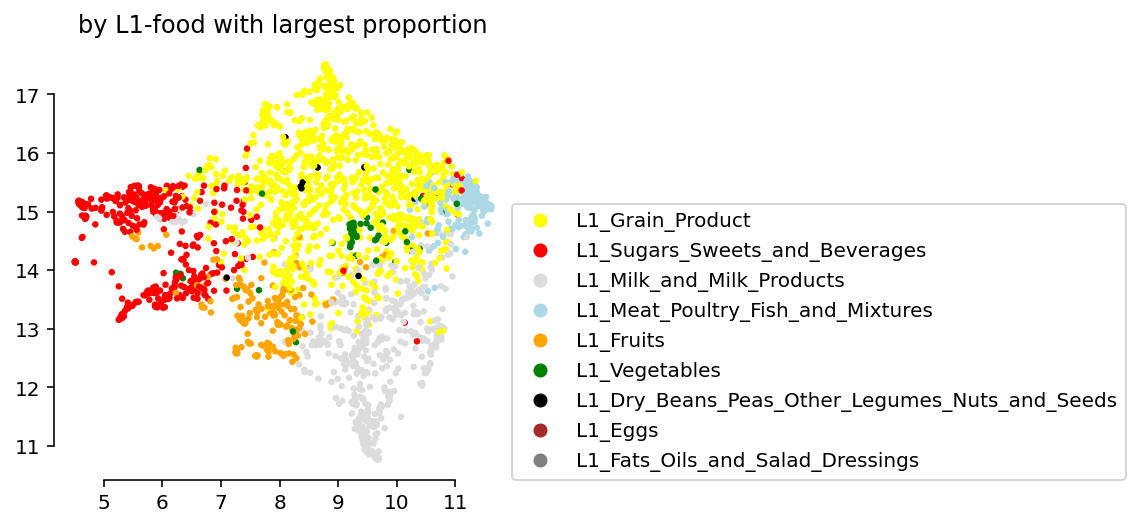

In [189]:
fig, ax = plt.subplots()


_l1_color_dict = dict(zip(['L1_Grain_Product', 'L1_Sugars_Sweets_and_Beverages',
 'L1_Milk_and_Milk_Products', 'L1_Meat_Poultry_Fish_and_Mixtures', 
 'L1_Fruits', 'L1_Vegetables',
 'L1_Dry_Beans_Peas_Other_Legumes_Nuts_and_Seeds', 'L1_Eggs', "L1_Fats_Oils_and_Salad_Dressings"],
['yellow', 'red',
 'gainsboro', 'lightblue', 
 'orange', 'green',
 'black', 'brown', "grey"]))

_c = food_L1.idxmax(axis=1).apply(lambda v: _l1_color_dict[v])

ax.scatter(tu.df_embedding['taxumap-LLLL-1'], tu.df_embedding['taxumap-LLLL-2'], c=_c.loc[tu.df_embedding.index], s=5)
ax.set_title("by L1-food with largest proportion")
ax.set_aspect('equal', 'box')
sns.despine(ax=ax, trim=True)


# The following two lines generate custom fake lines that will be used as legend entries:
markers = [plt.Line2D([0,0],[0,0],color=color, marker='o', linestyle='') for color in _l1_color_dict.values()]
plt.legend(markers, _l1_color_dict.keys(), numpoints=1, loc=(1,0))
fig.savefig("l1_food_with_largest_proportion.pdf", dpi=300, bbox_inches="tight")

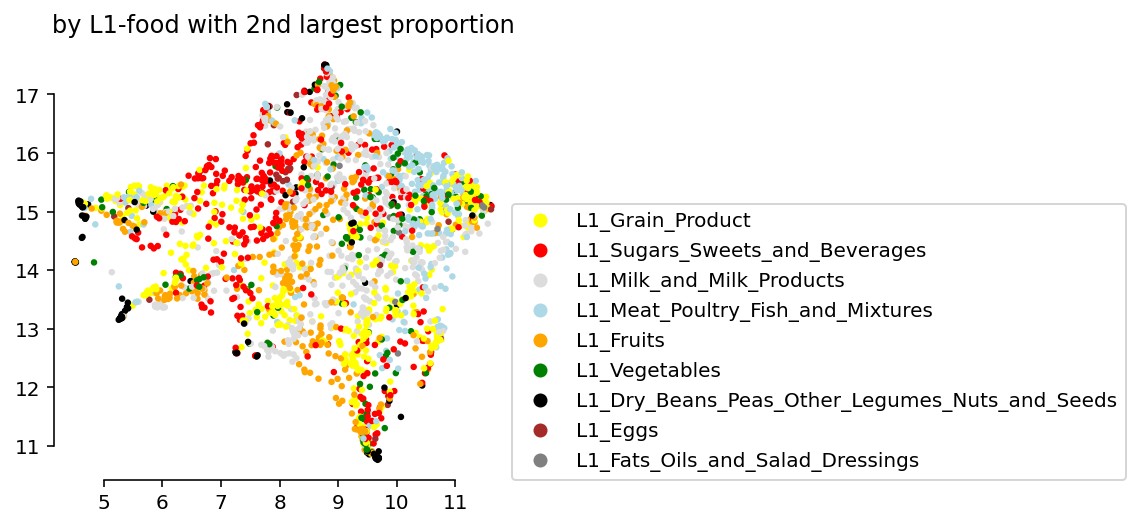

In [190]:
fig, ax = plt.subplots()

_c = food_L1.apply(lambda r: r.nlargest(2), axis=1).fillna(9).idxmin(axis=1).apply(lambda v: _l1_color_dict[v])

ax.scatter(tu.df_embedding['taxumap-LLLL-1'], tu.df_embedding['taxumap-LLLL-2'], c=_c.loc[tu.df_embedding.index], s=5)
ax.set_title("by L1-food with 2nd largest proportion")
ax.set_aspect('equal', 'box')
sns.despine(ax=ax, trim=True)


# The following two lines generate custom fake lines that will be used as legend entries:
markers = [plt.Line2D([0,0],[0,0],color=color, marker='o', linestyle='') for color in _l1_color_dict.values()]
plt.legend(markers, _l1_color_dict.keys(), numpoints=1, loc=(1,0))
fig.savefig("l1_food_with_2nd_largest_proportion.pdf", dpi=300, bbox_inches="tight")

In [191]:
# fig, ax = plt.subplots()

# from sklearn.preprocessing import LabelEncoder
# _c = food_L3.idxmax(axis=1)#.apply(lambda v: _l1_color_dict[v])
# lenc = LabelEncoder().fit(_c)
# _c = lenc.transform(_c)



# ax.scatter(tu.df_embedding['taxumap-LLLL-1'], tu.df_embedding['taxumap-LLLL-2'],c=_c, cmap="tab20", s=5)
# ax.set_title("by L3-food with largest proportion")
# ax.set_aspect('equal', 'box')
# sns.despine(ax=ax, trim=True)


# The following two lines generate custom fake lines that will be used as legend entries:
# markers = [plt.Line2D([0,0],[0,0],color=color, marker='o', linestyle='') for color in _l1_color_dict.values()]
# plt.legend(markers, _l1_color_dict.keys(), numpoints=1, loc=(1,0))

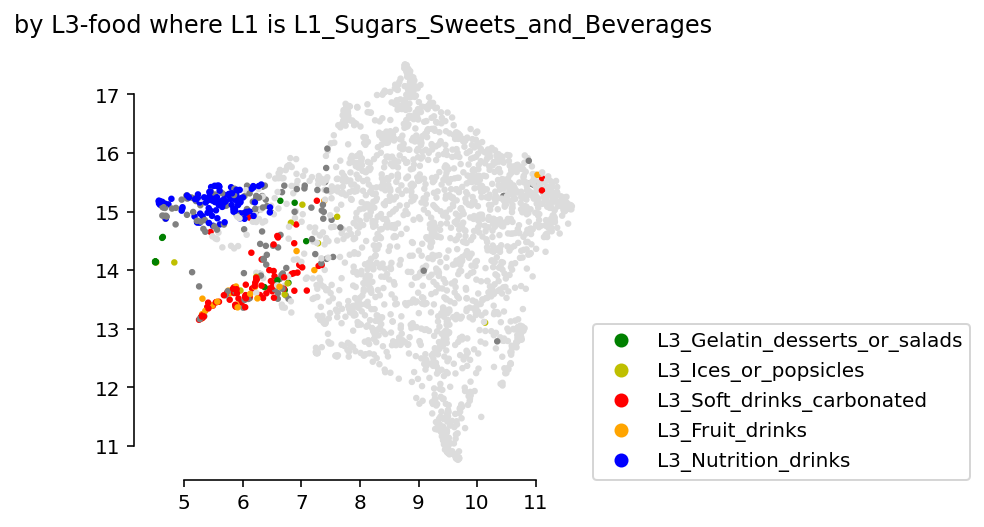

In [192]:
fig, ax = plt.subplots()
l1_max = food_L1.idxmax(axis=1)
from sklearn.preprocessing import LabelEncoder
_c = food_L3.idxmax(axis=1)#.apply(lambda v: _l1_color_dict[v])
_c.loc[l1_max!="L1_Sugars_Sweets_and_Beverages"] = "non L1_Sugars_Sweets_and_Beverages"



_c = _c.apply(lambda v: "b" if v == "L3_Nutrition_drinks" else ("r" if v=="L3_Soft_drinks_carbonated" else( "orange" if v == "L3_Fruit_drinks" else ("y" if v=="L3_Ices_or_popsicles" else ("g" if v == "L3_Gelatin_desserts_or_salads" else ("grey" if v != "non L1_Sugars_Sweets_and_Beverages" else "gainsboro")))) ))
#lenc = LabelEncoder().fit(_c)
#_c = lenc.transform(_c)



ax.scatter(tu.df_embedding['taxumap-LLLL-1'], tu.df_embedding['taxumap-LLLL-2'],c=_c, cmap="tab20", s=5)
ax.set_title("by L3-food where L1 is L1_Sugars_Sweets_and_Beverages")
ax.set_aspect('equal', 'box')
sns.despine(ax=ax, trim=True)


_l3_color_dict = foodtax[["L3"]].join(
    foodtax.L3.apply(
        lambda v: "b" if v == "L3_Nutrition_drinks" else (
            "r" if v=="L3_Soft_drinks_carbonated" else( 
                "orange" if v == "L3_Fruit_drinks" else (
                    "y" if v=="L3_Ices_or_popsicles" else (
                        "g" if v == "L3_Gelatin_desserts_or_salads" else (
                            "grey" if v != "non L1_Sugars_Sweets_and_Beverages" else "gainsboro")))) )), rsuffix="color").drop_duplicates().query("L3color != 'grey'").set_index("L3").to_dict()["L3color"]

# The following two lines generate custom fake lines that will be used as legend entries:
markers = [plt.Line2D([0,0],[0,0],color=color, marker='o', linestyle='') for color in _l3_color_dict.values()]
plt.legend(markers, _l3_color_dict.keys(), numpoints=1, loc=(1,0))

fig.savefig("l3_food_with_largest_proportion_when_l1_was_sugars_and_sweets.pdf", dpi=300, bbox_inches="tight")

In [181]:
tu.df_embedding.to_csv("/Users/schluj05/data/diet food mskcc/embedding_for_angel.csv")


In [184]:
tu.to_pickle()

Taxumap(agg_levels = ['L1', 'L2', 'L3', 'L4'], weights = [5, 5, 0.01, 0.01], rel_abundances = 'loaded from local scope', taxonomy = 'loaded from local scope')